In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
df_num = df[['Age','SibSp','Parch','Fare']]
df_cat = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

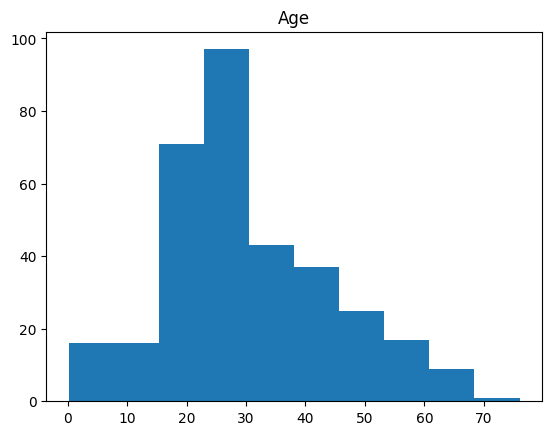

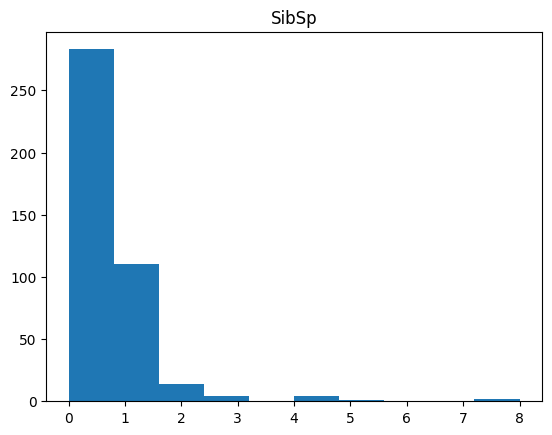

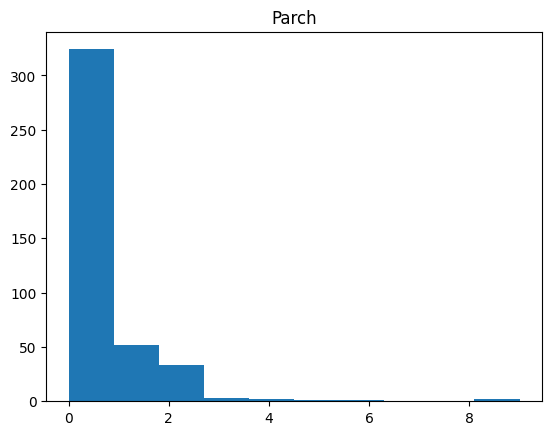

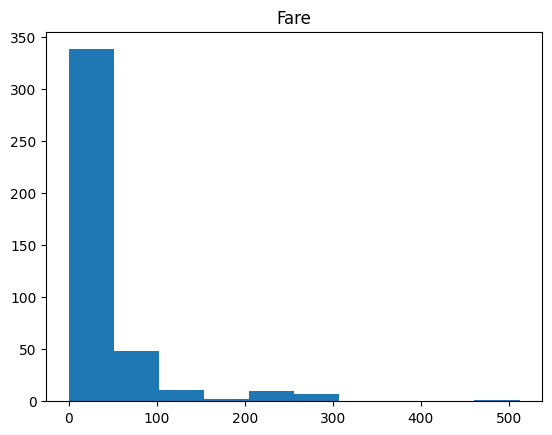

In [5]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.091587 -0.061249  0.337932
SibSp -0.091587  1.000000  0.306895  0.171539
Parch -0.061249  0.306895  1.000000  0.230046
Fare   0.337932  0.171539  0.230046  1.000000


<Axes: >

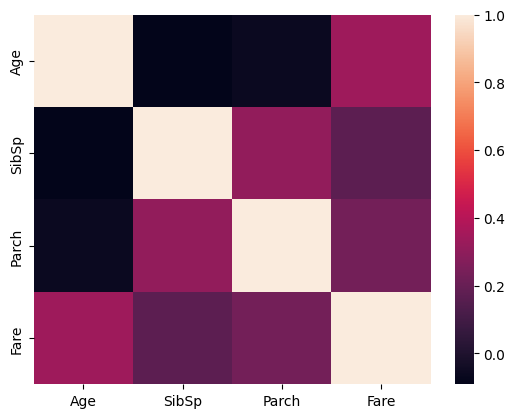

In [6]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [7]:
pd.pivot_table(df,index = 'Survived',values =['Age','SibSp','Parch','Fare'] )

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.272732,27.527877,0.274436,0.379699
1,30.272362,49.747699,0.598684,0.565789


In [9]:
print(pd.pivot_table(df,index = 'Survived',columns='Pclass',values ='Ticket',aggfunc='count' ))
print()
print(pd.pivot_table(df,index = 'Survived',columns='Sex',values ='Ticket',aggfunc='count' ))
print()
print(pd.pivot_table(df,index = 'Survived',columns='Embarked',values ='Ticket',aggfunc='count' ))

Pclass     1   2    3
Survived             
0         57  63  146
1         50  30   72

Sex       female   male
Survived               
0            NaN  266.0
1          152.0    NaN

Embarked   C   Q    S
Survived             
0         62  22  182
1         40  24   88


In [10]:
df_cat.Cabin
df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df['cabin_multiple'].value_counts()

0    327
1     74
2     10
3      4
4      3
Name: cabin_multiple, dtype: int64

In [11]:
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])

In [12]:
print(df.cabin_adv.value_counts())
pd.pivot_table(df,index = 'Survived',columns ='cabin_adv', values = 'Name', aggfunc = 'count')

n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,n
Survived,,,,,,,,
0,4.0,9.0,16.0,8.0,5.0,5.0,NaN,219.0
1,3.0,9.0,19.0,5.0,4.0,3.0,1.0,108.0


In [13]:
df['numeric_ticket']= df.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
df['ticket_letters'] =df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [14]:
df['numeric_ticket'].value_counts()


1    296
0    122
Name: numeric_ticket, dtype: int64

In [15]:
df['ticket_letters'].value_counts()

0          296
pc          32
ca          27
sotonoq      9
scparis      8
a5           7
wc           5
sopp         4
fcc          4
stono2       3
a4           3
c            3
scah         2
fc           2
soc          2
sotono2      1
lp           1
sc           1
a2           1
aq4          1
sca4         1
wep          1
stonoq       1
pp           1
sca3         1
aq3          1
Name: ticket_letters, dtype: int64

In [16]:
df.Name.head(50)
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [17]:
df.name_title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: name_title, dtype: int64

In [18]:
pd.pivot_table(df,index = 'Survived',columns ='name_title', values = 'Name', aggfunc = 'count')

name_title,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Survived,,,,,,,,,
0,2.0,NaN,1.0,21.0,NaN,240.0,NaN,NaN,2.0
1,NaN,1.0,NaN,NaN,78.0,NaN,72.0,1.0,NaN


,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,cabin_adv_n,name_title_Col,name_title_Dona,name_title_Dr,name_title_Master,name_title_Miss,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev
0,34.5,0,0,2.178064,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,47.0,1,0,2.079442,0,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
2,62.0,0,0,2.369075,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,27.0,0,0,2.268252,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,22.0,1,1,2.586824,0,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,27.0,0,0,2.202765,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
414,39.0,0,0,4.699571,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
415,38.5,0,0,2.110213,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
416,27.0,0,0,2.202765,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


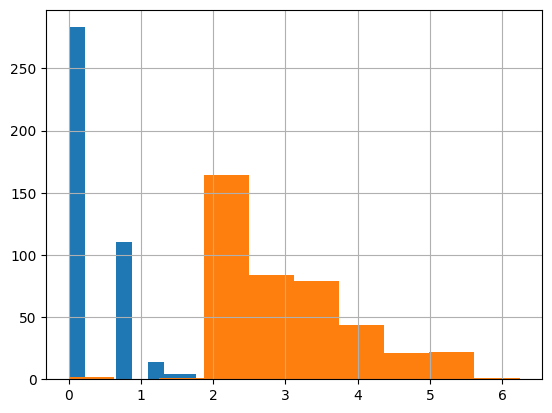

In [19]:
df.Age = df.Age.fillna(df.Age.median())
df.Fare = df.Fare.fillna(df.Fare.median())
df.dropna(subset=['Embarked'],inplace = True)
df['norm_sibsp'] = np.log(df.SibSp+1)
df['norm_sibsp'].hist()
df['norm_fare'] = np.log(df.Fare+1)
df['norm_fare'].hist()
df.Pclass = df.Pclass.astype(str)
all_dummies = pd.get_dummies(df[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title']])
all_dummies

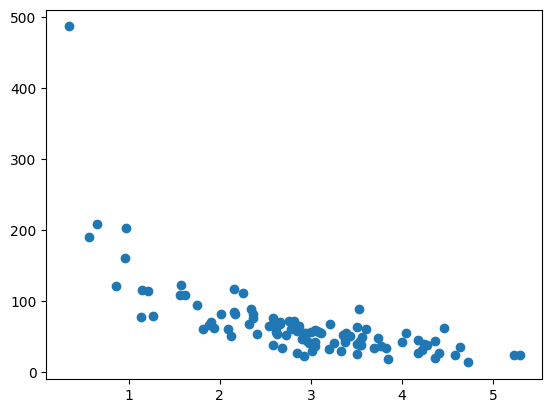

In [21]:
np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

In [22]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

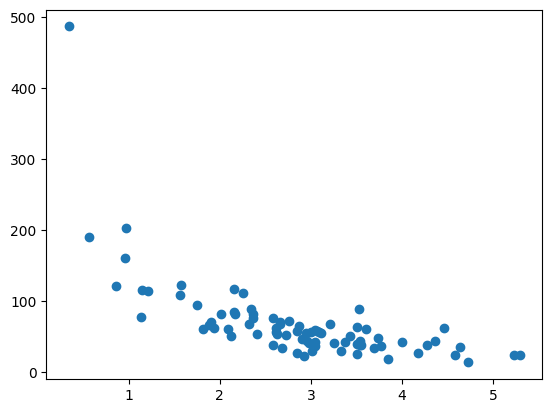

In [23]:
plt.scatter(train_x, train_y)
plt.show()

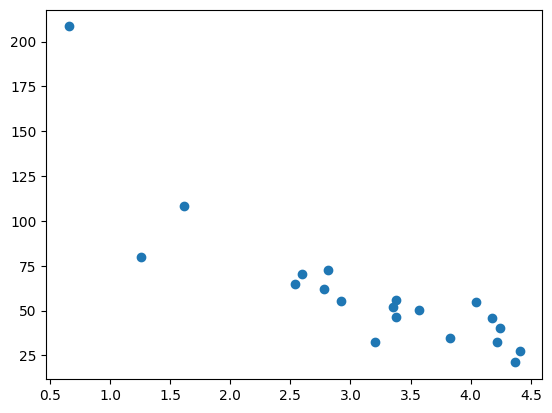

In [24]:
plt.scatter(test_x, test_y)
plt.show()